## **Movies Industry Analysis and Correlations** 

- **Context**: 
Is the movie industry dying? Is Netflix the new entertainment king? Those were the first questions that lead me to focus on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the movie industry, and get answers.

- **Data Description**: There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes: budget, company, country, director, genre, gross, name, rating, released date, runtime, score, vote, star, writer, year




### **Import Libraries** 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
plt.style.available
plt.style.use('bmh')
from matplotlib.pyplot import figure 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

### **Load the Dataset**

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### **Dataset Overview** 

In [4]:
df.shape

(7668, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### **Looking for missing data**

In [7]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
for col in df.columns:
    pct_missing = np.mean([df[col].isnull()])
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### **Data Cleaning**

#### Fill or remove the missing data

In [9]:
# Fill the empty cells in the (votes, budget, gross, rating) columns
x = df["votes"].mean()
w = df["gross"].mean()
f = df["runtime"].mean()
z = np.random.choice(["R", "PG", "NC-17", "PG-13", "Not Rated", "G", "Unrated"])

df["votes"].fillna(x, inplace = True)
df["gross"].fillna(w, inplace = True)
df["rating"].fillna(z, inplace = True)
df["runtime"].fillna(f, inplace = True)

In [10]:
# Fill empty cells in "Budget" with random data from existing values
existing_budgets = df.dropna(subset=["budget"])["budget"]
df["budget"] = df["budget"].apply(lambda x: np.random.choice(existing_budgets) if pd.isnull(x) else x)

In [11]:
# Delete the cells that can't be filled and delete the duplicated data in the dataframe
df = df.dropna()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
# Check
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

#### Change the datatype

In [13]:
# Change the datatype of columns (votes, budget, gross, runtime) to int64
df["votes"] = df["votes"].astype('int64')
df["budget"] = df["budget"].astype('int64')
df["gross"] = df["gross"].astype('int64')
df["runtime"] = df["runtime"].astype('int64')


In [14]:
# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7645 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7645 non-null   object 
 1   rating    7645 non-null   object 
 2   genre     7645 non-null   object 
 3   year      7645 non-null   int64  
 4   released  7645 non-null   object 
 5   score     7645 non-null   float64
 6   votes     7645 non-null   int64  
 7   director  7645 non-null   object 
 8   writer    7645 non-null   object 
 9   star      7645 non-null   object 
 10  country   7645 non-null   object 
 11  budget    7645 non-null   int64  
 12  gross     7645 non-null   int64  
 13  company   7645 non-null   object 
 14  runtime   7645 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 955.6+ KB


In [15]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,24000000,1400,British Broadcasting Corporation (BBC),103
7625,The Untold Story,NC-17,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,26000000,790,Visual Arts Entertainment,104
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,16000000,682,Roxwell Films,93
2417,Madadayo,NC-17,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134


### **Finding Correlations**

#### Is There Any Correlation That Influence the Gross Revenue?!

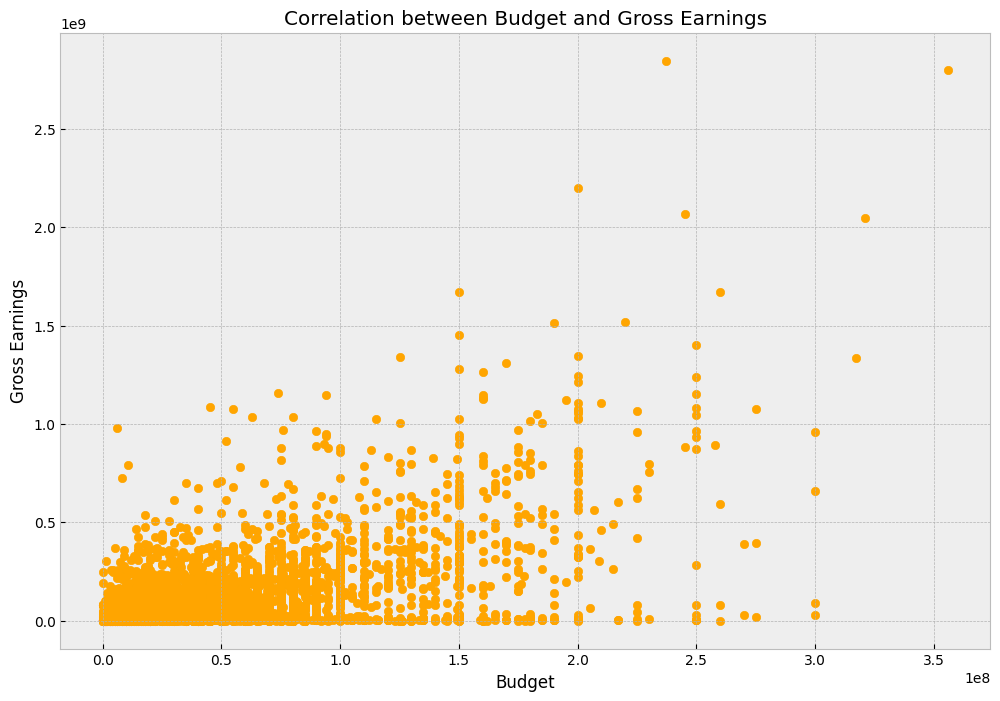

In [21]:
# Build a scatter plot with budget vs gross to see the correlation

plt.scatter(x= df['budget'], y = df['gross'], color = 'orange');
plt.title('Correlation between Budget and Gross Earnings');
plt.xlabel('Budget');
plt.ylabel('Gross Earnings');

<Axes: xlabel='budget', ylabel='gross'>

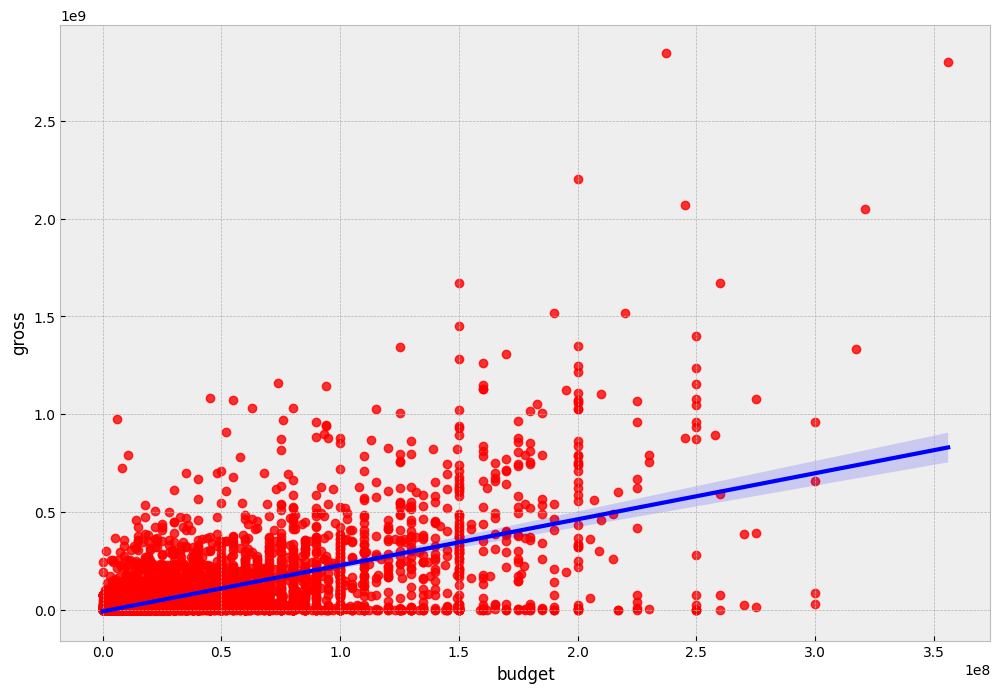

In [24]:
# Plot budget vs gross using seaborn
sns.regplot(data = df, x = 'budget', y ='gross', scatter_kws={"color": "red"}, line_kws={"color": 'blue'});

#### Correlations for numeric values only

In [30]:
df.corr(method ='pearson', numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097922,0.223123,0.222475,0.252334,0.119750
score,0.097922,1.000000,0.409468,0.048980,0.182881,0.399922
votes,0.223123,0.409468,1.000000,0.350792,0.628735,0.308901
budget,0.222475,0.048980,0.350792,1.000000,0.598239,0.218582
gross,0.252334,0.182881,0.628735,0.598239,1.000000,0.241296
runtime,0.119750,0.399922,0.308901,0.218582,0.241296,1.000000


In [34]:
df.corr(method ='spearman', numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.098397,0.470663,0.232447,0.266851,0.142043
score,0.098397,1.000000,0.428223,-0.003825,0.117714,0.399523
votes,0.470663,0.428223,1.000000,0.333168,0.689869,0.288444
budget,0.232447,-0.003825,0.333168,1.000000,0.452784,0.236894
gross,0.266851,0.117714,0.689869,0.452784,1.000000,0.227333
runtime,0.142043,0.399523,0.288444,0.236894,0.227333,1.000000


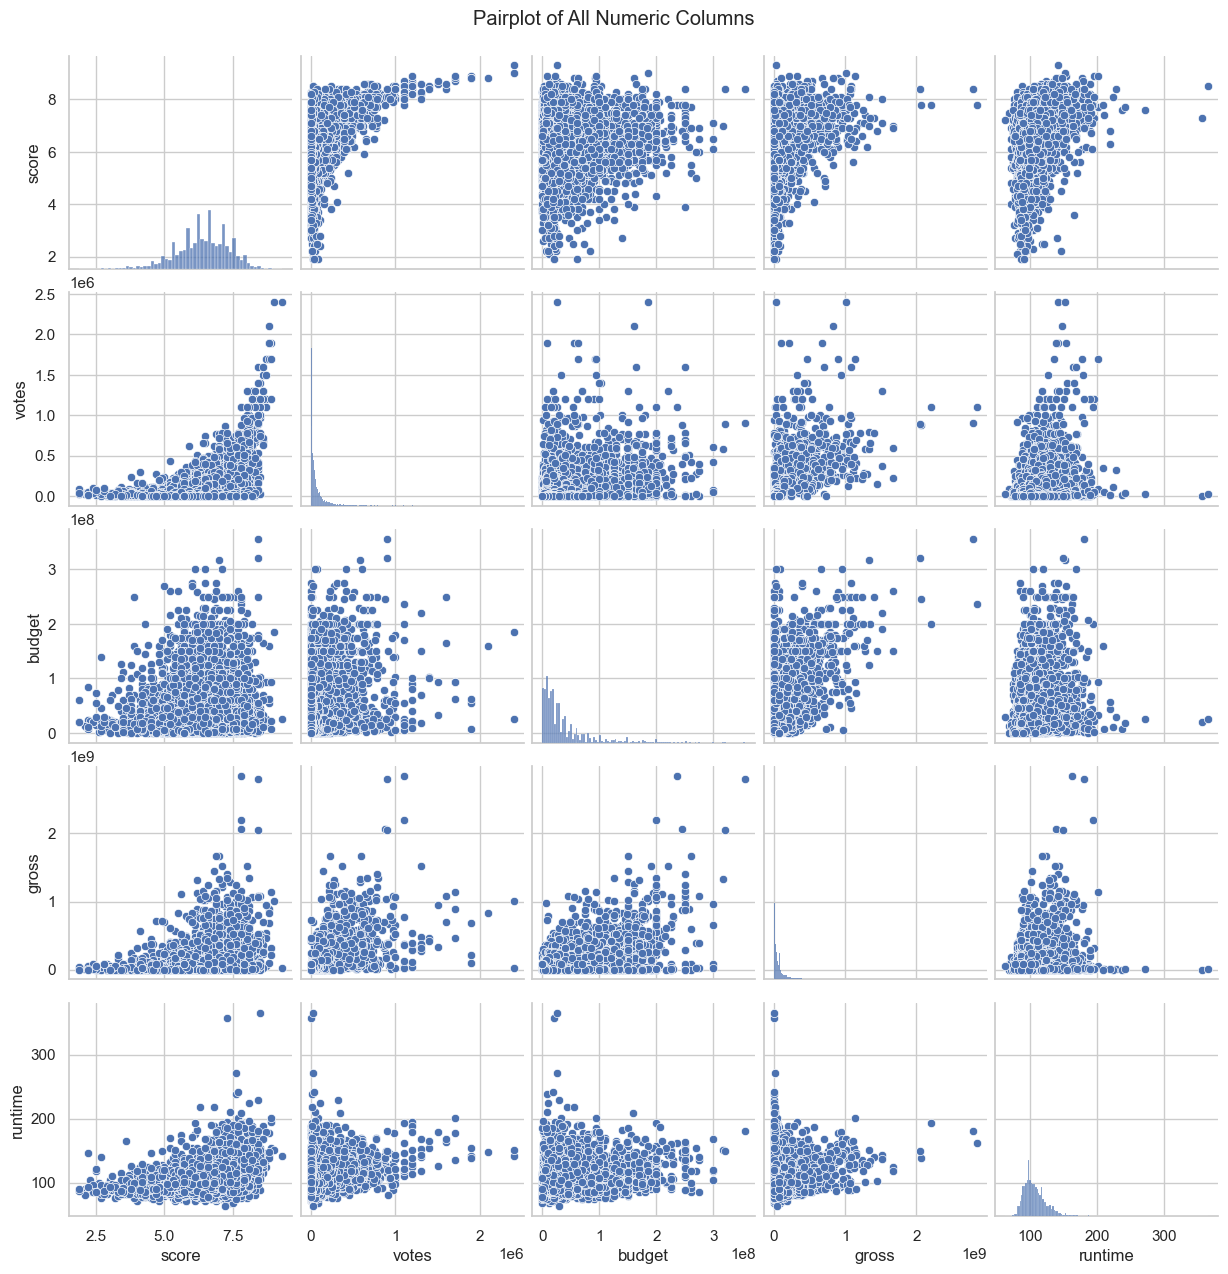

In [52]:
# Pairplot of All Numeric Columns Features

warnings.filterwarnings("ignore")
sns.pairplot(data=df, vars=["score", "votes", "budget", "gross", "runtime"])

plt.suptitle("Pairplot of All Numeric Columns", y=1.02)
plt.show()

warnings.filterwarnings("default")

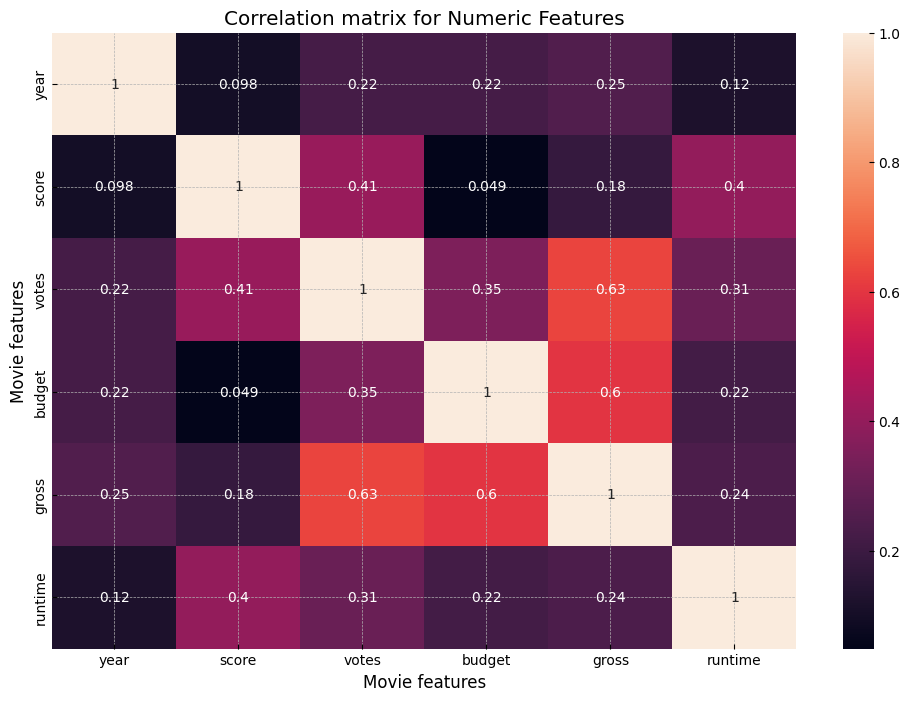

<Figure size 1000x800 with 0 Axes>

In [27]:
# Let's start looking at correlation
correlation_matrix = df.corr(method ='pearson',numeric_only = True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.figure(figsize=(10, 8))  
plt.show()

#### Correlations for categorized values

In [36]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.155058,0.037323,0.965566,0.959660,-0.045621,0.289190,0.745645,0.805879,0.730610,0.141565,0.140954,0.951108,0.592808,0.047991
rating,0.155058,1.000000,-0.089168,0.167093,0.157444,0.014025,0.102927,0.101297,0.117387,0.110590,0.030516,0.090660,0.160659,-0.007372,0.039541
genre,0.037323,-0.089168,1.000000,0.038199,0.036942,-0.002863,0.024110,0.047872,0.035782,0.039600,-0.016876,0.025038,0.038098,0.007959,0.000253
year,0.965566,0.167093,0.038199,1.000000,0.993988,-0.043776,0.313956,0.770382,0.825877,0.755571,0.138883,0.152906,0.984832,0.602721,0.049746
released,0.959660,0.157444,0.036942,0.993988,1.000000,-0.044459,0.301651,0.771301,0.821122,0.754644,0.146759,0.148841,0.979683,0.608675,0.046295
score,-0.045621,0.014025,-0.002863,-0.043776,-0.044459,1.000000,-0.011883,-0.022680,-0.034699,-0.008700,0.023667,0.000732,-0.046532,-0.027259,0.026754
votes,0.289190,0.102927,0.024110,0.313956,0.301651,-0.011883,1.000000,0.193401,0.224498,0.181357,-0.046968,0.204275,0.287945,0.010910,0.105489
director,0.745645,0.101297,0.047872,0.770382,0.771301,-0.022680,0.193401,1.000000,0.749829,0.681849,0.154395,0.072947,0.753774,0.552919,-0.011628
writer,0.805879,0.117387,0.035782,0.825877,0.821122,-0.034699,0.224498,0.749829,1.000000,0.676469,0.157690,0.108723,0.810582,0.548844,0.031090
star,0.730610,0.110590,0.039600,0.755571,0.754644,-0.008700,0.181357,0.681849,0.676469,1.000000,0.181816,0.088182,0.739780,0.527993,0.035347


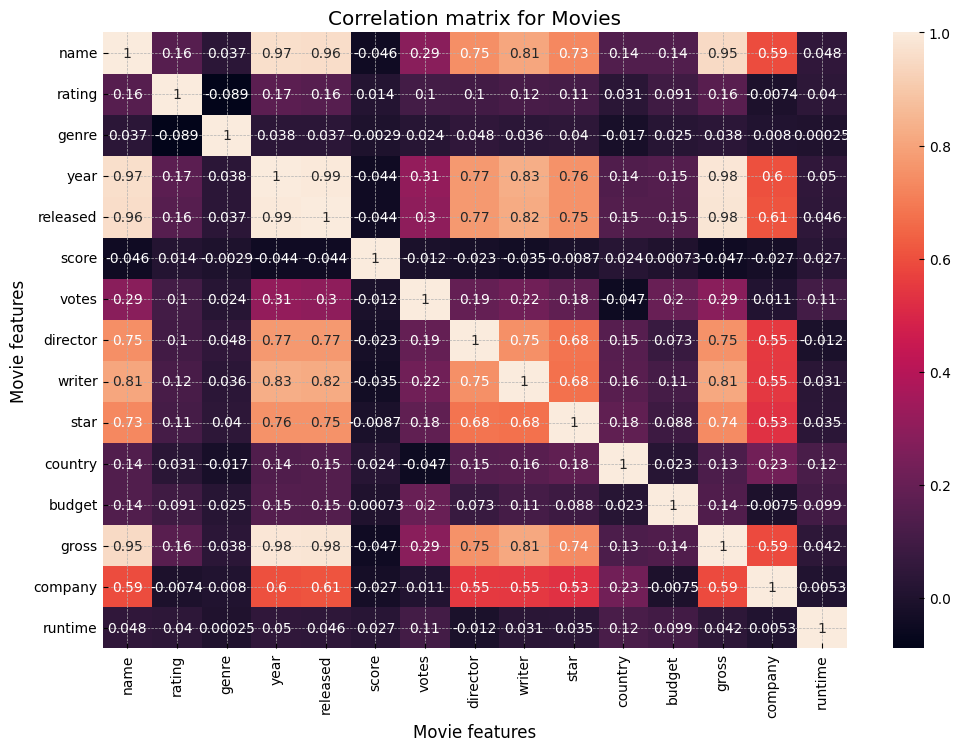

In [37]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

=> **Conclusion:**:
* There is a Very Strong Positive Correlation Between Budget and Gross Revenue ..There Is a Strong Positive Correlation Between Votes and Gross Revenue (0.63)
* The more budget increases, the more gross revenue expected.
* The number of votes almost refers to the approximate number of people who watched the movie.
And the more that number increases, the more revenue.

### **Asking Questions about Movies and get Insights**

In [38]:
# 1. How many movies are in the DataFrame?

print('How many movies are in the DataFrame? \n')
num_movies = df['name'].nunique()
print("Number of movies:", num_movies)

How many movies are in the DataFrame? 

Number of movies: 7490


In [39]:
# 2. What is the average score of the movies?

print('What is the average score of the movies? \n')
average_score = df["score"].mean()
print("Average score:", round(average_score, 3))

What is the average score of the movies? 

Average score: 6.392


In [40]:
# 3. What is the highest grossing movie?

print('What is the highest grossing movie? \n')
highest_grossing_movie = df[df["gross"] == df["gross"].max()]["name"].iloc[0]
print("Highest grossing movie:", highest_grossing_movie)

What is the highest grossing movie? 

Highest grossing movie: Avatar


In [45]:
# 4. What Are The Top 10 Rated Movies?!
print('Top 10 highest-rated Movies:')
filt = df["score"].nlargest(10)
top_rated_movie = df.loc[filt.index, ["name", "score"]]
top_rated_movie.reset_index(drop=True)

Top 10 highest-rated Movies:


,name,score
0,The Shawshank Redemption,9.3
1,The Dark Knight,9.0
2,Schindler's List,8.9
3,Pulp Fiction,8.9
4,The Lord of the Rings: The Return of the King,8.9
5,Forrest Gump,8.8
6,Fight Club,8.8
7,The Lord of the Rings: The Fellowship of the Ring,8.8
8,Inception,8.8
9,Star Wars: Episode V - The Empire Strikes Back,8.7


In [48]:
# 6. What is the most common genre among the movies?

print('What is the most common genre among the movies? \n ')
most_common_genre = df["genre"].value_counts().idxmax()
print("Most common genre:", most_common_genre)

What is the most common genre among the movies? 
 
Most common genre: Comedy


### **Some Visualizations**

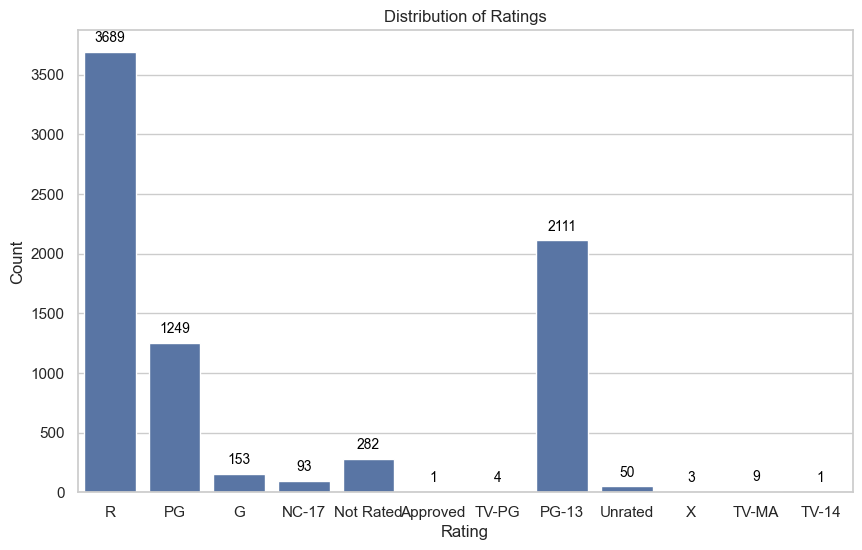

In [49]:
sns.set(style="whitegrid")

# Distribution of Ratings
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


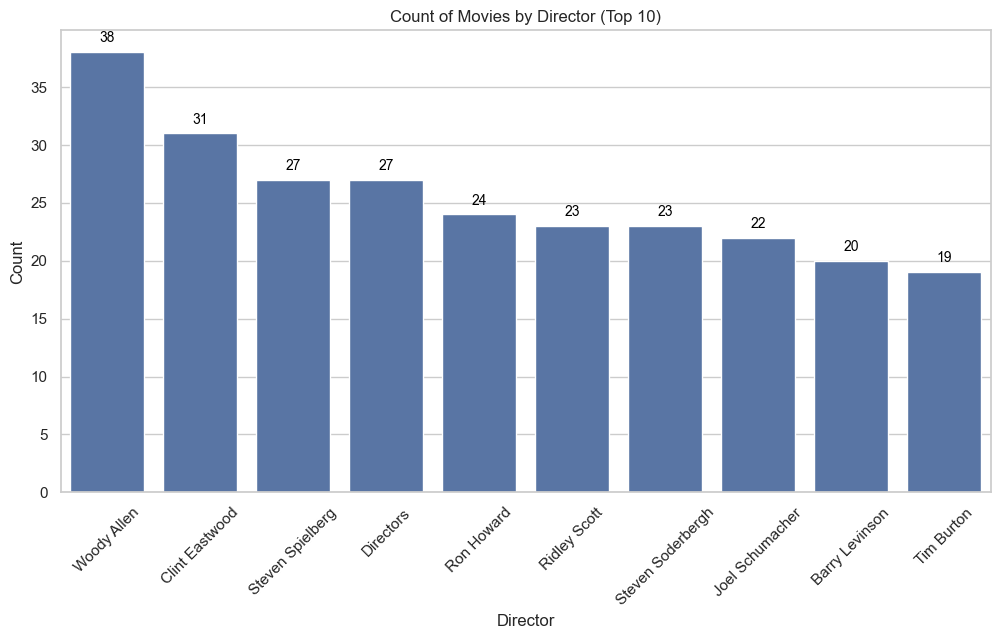

In [50]:
plt.figure(figsize=(12, 6))
director_counts = df["director"].value_counts().head(10)
ax = sns.barplot(x=director_counts.index, y=director_counts.values)
plt.xlabel("Director")
plt.ylabel("Count")
plt.title("Count of Movies by Director (Top 10)")
plt.xticks(rotation=45)

# Adding annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

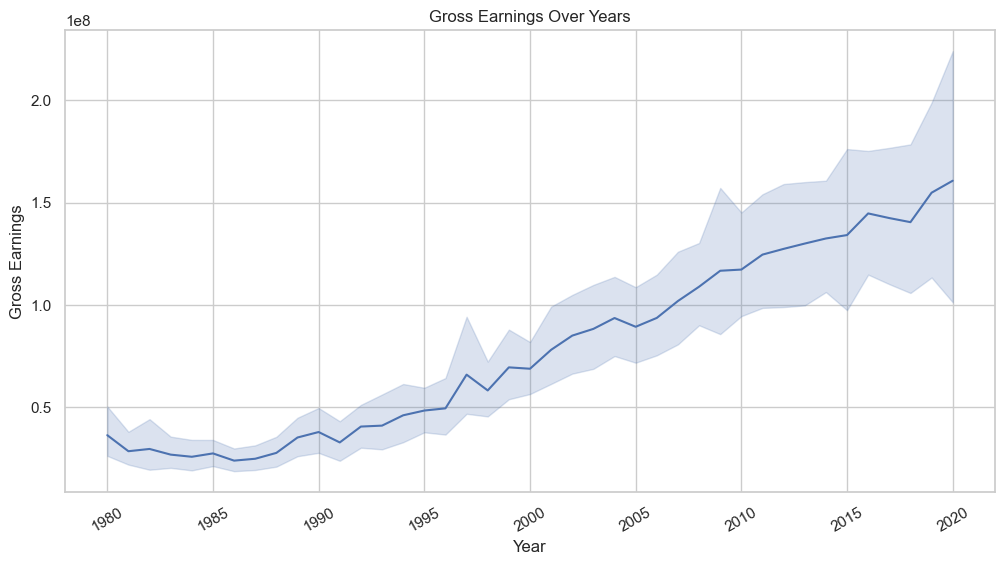

In [51]:
# Line Plot of Gross Earnings Over Years

plt.figure(figsize=(12, 6))
df["year"] = df["year"].astype(int)
sns.lineplot(data=df, x="year", y="gross")
plt.xlabel("Year")
plt.ylabel("Gross Earnings")
plt.title("Gross Earnings Over Years")
plt.xticks(rotation=30)
plt.show()

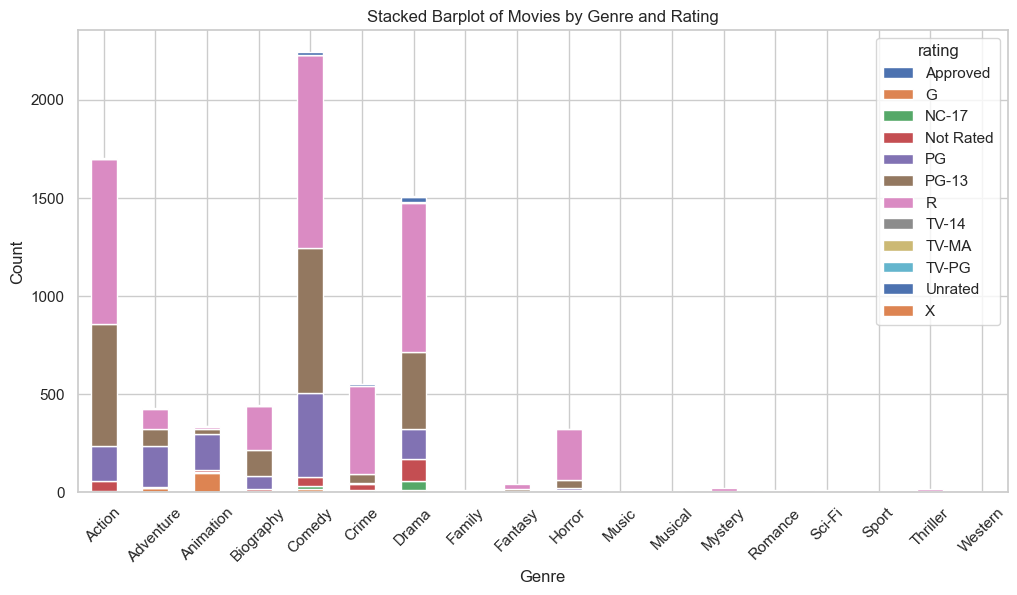

In [53]:
# Stacked Barplot of Movies by Genre and Rating

genre_rating_counts = df.groupby(["genre", "rating"]).size().unstack()
genre_rating_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Stacked Barplot of Movies by Genre and Rating")
plt.xticks(rotation=45)
plt.show()